# **Tugas 2**

**Penjelasan Outlier Deteksi**

**Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**

1. **Apa itu outlier Deteksi?**

Outlier detection adalah proses identifikasi data atau pengamatan yang memiliki nilai yang sangat berbeda (menyimpang) dari mayoritas data lainnya dalam sebuah dataset. Outlier ini bisa menunjukkan kesalahan pengukuran, variabilitas yang ekstrem, atau kejadian yang tidak biasa.

2. **Outlier Deteksi dengan Menggunakan k-Nearest Neighbors (k-NN) pada Data Understanding**

k-Nearest Neighbors (k-NN) adalah salah satu metode yang dapat digunakan untuk mendeteksi outlier pada proses Data Understanding. Metode ini bekerja dengan cara menghitung jarak antara titik data dengan k tetangga terdekatnya. Jika sebuah data memiliki jarak yang jauh dari tetangga-tetangganya, maka data tersebut dianggap sebagai outlier.

3. **Penjelasan k-NN (k-Nearest Neighbors) pada Data Understanding**

Dalam tahap Data Understanding pada proses analisis data, k-NN (k-Nearest Neighbors) digunakan sebagai salah satu metode untuk mendeteksi outlier atau anomali pada dataset.

4. Langkah-langkah Deteksi Outlier Dengan KNN (K-Nearest Neighbors)

Deteksi outlier menggunakan metode k-NN (k-Nearest Neighbors) berbasis jarak dilkukan dengan beberapa tahapan sistematis dalam proses **Data Understanding**.

Ada beberapa langkah deteksi outler dengan KNN :    
1. Data Collection (Pengumpulan data)
Kumpulkan dataset yang akan digunakan, Data bisa berasal dari :    
- Database (MySQL, PostgreSQL, dll)
- File CSV, Excel
- APl
- Dataset publik
2. Data Preprocessing (Persiapan Data)
Tahapan ini meliputi :
- Menghapus data yang kosong (Missing Value)
- Normalisasi data (jika diperlukan)
- Seleksi fitur numerik yang relevan
3. Pemilihan Fitur (Feature Selection)
Pilih gitur numerik yang akan digunakan untuk mendeteksi outlier.
Contoh fitur pada dataset iris :
- sepal_length
- sepal_width
- petal_length
- petal_width
4. Hitung Jarak Euclidean (Distance Calculation)
Gunakan rumus Eucliden Distance untuk menghitung jarak antara data dengan data lainnya.

Rumus Euclidean Distance :

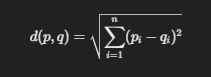

di mana :
- p adalah data saat ini
- q adalah data tetangga terdekat
- n adalah jumlah fitur
5. Tentukan Jumlah Tetangga (k)
Tentukan jumlah k (tetangga terdekat) untuk membandingkan jarak data
Contoh :
- k = 3 (3 tetangga terdekat)
- k = 5 (5 tetangga terdekat)
6. Hitung Jarak Ke Tetangga Terdekat
Untuk setiap data, hitung jarak ke k tetangga terdekat menggunakan rumus euclidean.
7. Tentukan Threshold (Batas Outlier)
Gunakan metode berikut untuk menentukan threshold :
- Persentil (Percentile)
- Rata-rata + Standar Deviasi
- IQR (Interquartile Range)
8. Identifikasi Outlier
Jika jarak data lebih besar dari threshold, maka data tersebut dianggap sebagai outlier
9. Visualisasi Outlier
Gunakan scatter plot untuk memvisualisasikan hasil deteksi outlier
10. Evaluasi Hasil
Cek apakah jumlah outlier masuk akal dan sesuai dengan karakteristik data


5. **Kelebihan dan Kekurangan Metode k-NN untuk Deteksi Outlier**

Metode k-Nearest Neighbors (k-NN) adalah salah satu metode yang sering digunakan dalam Outlier Detection karena berbasis jarak (distance-based). Meskipun metode ini sederhana, namun memiliki keunggulan dan kelemahan tertentu.

# Kelebihan
- Sederhana & Mudah Dipahami
- Tidak Memerlukan Asumsi Distribusi Data
- Bisa Digunakan di Berbagai Jenis Data
- Mudah Diimplementasikan
- Deteksi outlier yang bersifat lokal
- Non-parametrik

# Kekurangan
- Sensitif Terhadap Skala Data
- Lambat pada Dataset Besar
- Sulit Menentukan Nilai k yang Optimal
- Tidak Tahan Terhadap Noise
- Butuh Banyak Memori
- Tidak Efisien pada Data Berdimensi Tinggi (Curse of Dimensionality)

6. **Kesimpulan**

Metode K-Nearest Neighbors (KNN) efektif digunakan dalam mendeteksi outlier pada dataset. Penentuan threshold yang tepat sangat penting untuk memastikan data yang terdeteksi benar-benar merupakan outlier dan bukan variasi normal dalam dataset.

Langkah awal menjelaskan bawa kode tersebut adalah perintah untuk menginstal dua pustaka libraries pyhton menggunkan pip, yaitu manajer paket untuk python.

- %pip install pymysql : Perintah ini menginstal pustaka pymsql. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database MySQL dari kode Pyhton.

- %pip install psycopg2 : Perintah ini menginstal pustaka psycopg2. Pustaka ini digunakan untuk menghubungkan dan berinteraksi dengan database PostgreSQL dari kode Pyhton.

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.5 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa           1.4          0.2           4.9          3.0  5.244044    False
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

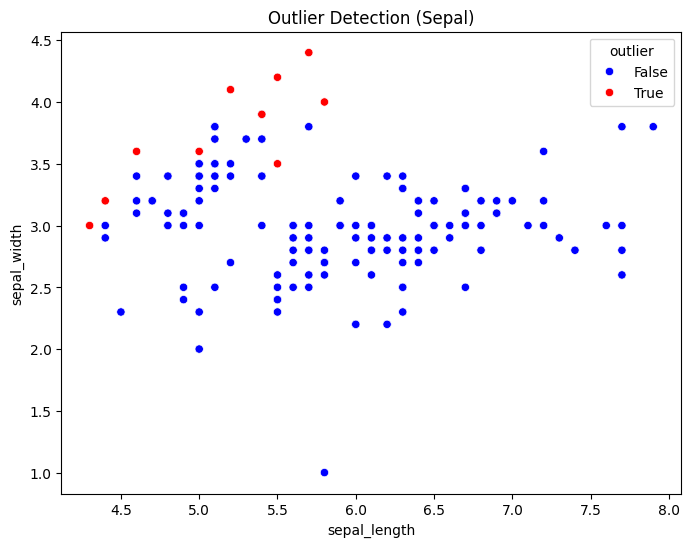

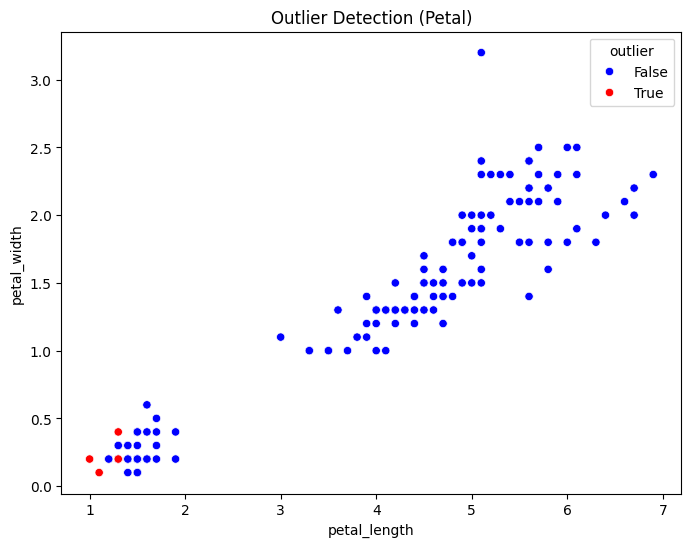

In [12]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-3a2b4d8e-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_SEwXstfyAuXfxU81qVv",
        database="defaultdb",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-44ea6f9-cahyanti625-f7a8.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_Dp0q1x-sz9BpvjujgPO",
        database="iris",
        port=22424
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()

In [13]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 10


In [14]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151            ????           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          